Exercises

- Select a dataset with a continuous target variable.
- Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.
- Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [32]:
import pandas as pd
import numpy as np
import wrangle
from pydataset import data
import seaborn as sns
import os
from env import host, user, password
import explore
import math

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

#####################################

patient:
Patient number

time1:
Time one of recurrence of infection, days

infect1:
Indicator infection one (1=yes, 0=no)

time2:
Time two of recurrence of infection, days

infect2:
Indicator infection two (1=yes, 0=no)

age:
Patient's age

gender:
Patient's gender

gn:
Disease type GN (1=yes, 0=no)

an:
Disease type AN (1=yes, 0=no)

pkd:
Disease type PKD (1=yes, 0=no)

###wanna predict time 3 of infection reccurence, days###

#######################################################

## MVP FIRST!



- Acquired 
- Split data
- Model

In [5]:
##Acquiring the data
kidney_df = data('kidrecurr')
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 1 to 38
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   patient  38 non-null     int64  
 1   time1    38 non-null     int64  
 2   infect1  38 non-null     int64  
 3   time2    38 non-null     int64  
 4   infect2  38 non-null     int64  
 5   age      38 non-null     float64
 6   gender   38 non-null     int64  
 7   gn       38 non-null     int64  
 8   an       38 non-null     int64  
 9   pkd      38 non-null     int64  
dtypes: float64(1), int64(9)
memory usage: 3.3 KB


In [6]:
#renaming columns: changed time to time to frist reccurrence of infection.
kidney_df.rename(columns = {'time1': 'time_to_first_recurrence','time2': 'time_to_second_recurrence','infect1': 'first_infect_recurrence', 'infect2':'second_infect_recurrence' }, inplace =True)

In [7]:
kidney_df.head()

,patient,time_to_first_recurrence,first_infect_recurrence,time_to_second_recurrence,second_infect_recurrence,age,gender,gn,an,pkd
1,1,16,1,8,1,28.0,0,0,0,0
2,2,13,0,23,1,48.0,1,1,0,0
3,3,22,1,28,1,32.0,0,0,0,0
4,4,318,1,447,1,31.5,1,0,0,0
5,5,30,1,12,1,10.0,0,0,0,0


In [9]:
#checking for empty values or nulls.
kindey_df = kidney_df.drop_duplicates()

In [12]:
# split the data
train, validate, test = wrangle.general_split(kidney_df,None)
train.shape, validate.shape, test.shape

((21, 10), (9, 10), (8, 10))

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 11 to 35
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient                    21 non-null     int64  
 1   time_to_first_recurrence   21 non-null     int64  
 2   first_infect_recurrence    21 non-null     int64  
 3   time_to_second_recurrence  21 non-null     int64  
 4   second_infect_recurrence   21 non-null     int64  
 5   age                        21 non-null     float64
 6   gender                     21 non-null     int64  
 7   gn                         21 non-null     int64  
 8   an                         21 non-null     int64  
 9   pkd                        21 non-null     int64  
dtypes: float64(1), int64(9)
memory usage: 1.8 KB


(Text(0.5, 1.0, 'age'),
 count    21.000000
 mean     42.214286
 std      14.795752
 min      10.000000
 25%      34.000000
 50%      44.000000
 75%      53.000000
 max      60.000000
 Name: age, dtype: float64)

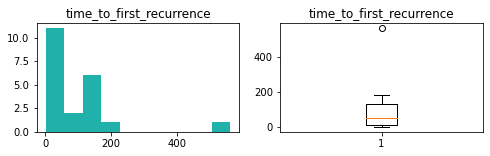

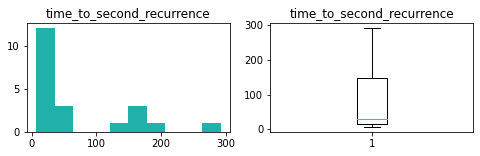

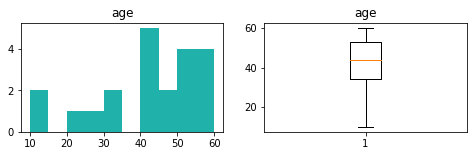

In [19]:
#doesnt appear to be normally distributed on numerical columns.
quant = ['time_to_first_recurrence','time_to_second_recurrence', 'age']

explore.explore_univariate_quant(train,quant[0])
explore.explore_univariate_quant(train,quant[1])
explore.explore_univariate_quant(train,quant[2])

gender 
_____________________

   chi2   p-value  degrees of freedom
0  18.0  0.455653                  18

observed:
 time_to_second_recurrence  7  8  12  16  22  23  25  28  30  33  43  46  63  \
gender                                                                        
0                          1  1   1   0   0   0   1   1   0   0   0   0   1   
1                          0  2   0   1   1   1   0   0   1   1   1   1   0   
All                        1  3   1   1   1   1   1   1   1   1   1   1   1   

time_to_second_recurrence  149  152  156  177  201  292  All  
gender                                                        
0                            0    1    0    0    0    0    7  
1                            1    0    1    1    1    1   14  
All                          1    1    1    1    1    1   21  

expected:
          0    1         2         3         4         5         6         7   \
0  0.333333  1.0  0.333333  0.333333  0.333333  0.333333  0.333333  0.333333  

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


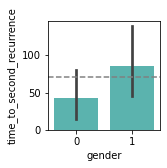


_____________________

gn 
_____________________

   chi2   p-value  degrees of freedom
0  21.0  0.279413                  18

observed:
 time_to_second_recurrence  7  8  12  16  22  23  25  28  30  33  43  46  63  \
gn                                                                            
0                          0  3   1   1   0   0   0   1   1   1   1   1   1   
1                          1  0   0   0   1   1   1   0   0   0   0   0   0   
All                        1  3   1   1   1   1   1   1   1   1   1   1   1   

time_to_second_recurrence  149  152  156  177  201  292  All  
gn                                                            
0                            1    1    0    1    1    1   16  
1                            0    0    1    0    0    0    5  
All                          1    1    1    1    1    1   21  

expected:
          0         1         2         3         4         5         6   \
0  0.761905  2.285714  0.761905  0.761905  0.761905  0.761905  

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


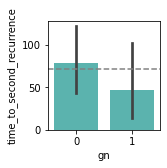


_____________________

an 
_____________________

   chi2   p-value  degrees of freedom
0  21.0  0.279413                  18

observed:
 time_to_second_recurrence  7  8  12  16  22  23  25  28  30  33  43  46  63  \
an                                                                            
0                          1  3   1   1   1   1   1   1   1   0   0   0   1   
1                          0  0   0   0   0   0   0   0   0   1   1   1   0   
All                        1  3   1   1   1   1   1   1   1   1   1   1   1   

time_to_second_recurrence  149  152  156  177  201  292  All  
an                                                            
0                            0    1    1    1    0    1   16  
1                            1    0    0    0    1    0    5  
All                          1    1    1    1    1    1   21  

expected:
          0         1         2         3         4         5         6   \
0  0.761905  2.285714  0.761905  0.761905  0.761905  0.761905  

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


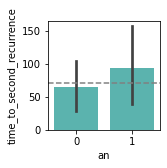


_____________________

pkd 
_____________________

   chi2   p-value  degrees of freedom
0  21.0  0.279413                  18

observed:
 time_to_second_recurrence  7  8  12  16  22  23  25  28  30  33  43  46  63  \
pkd                                                                           
0                          1  3   1   1   1   1   1   1   0   1   1   1   0   
1                          0  0   0   0   0   0   0   0   1   0   0   0   1   
All                        1  3   1   1   1   1   1   1   1   1   1   1   1   

time_to_second_recurrence  149  152  156  177  201  292  All  
pkd                                                           
0                            1    0    1    1    1    1   18  
1                            0    1    0    0    0    0    3  
All                          1    1    1    1    1    1   21  

expected:
          0         1         2         3         4         5         6   \
0  0.857143  2.571429  0.857143  0.857143  0.857143  0.857143 

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


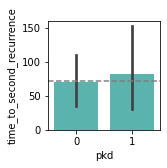


_____________________



In [20]:
explore.explore_bivariate_categorical(train,'time_to_second_recurrence', 'gender' )
explore.explore_bivariate_categorical(train,'time_to_second_recurrence', 'gn' )
explore.explore_bivariate_categorical(train,'time_to_second_recurrence', 'an' )
explore.explore_bivariate_categorical(train,'time_to_second_recurrence', 'pkd' )

In [23]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(kidney_df,'time_to_second_recurrence')

In [24]:
#creating baseline
baseline = y_train.mean()

In [27]:
#creating predictions.actual and predictions.baseline
predictions = pd.DataFrame()
predictions['actual'] = y_train
predictions['baseline'] = baseline
predictions

,actual,baseline
2,23,91.47619
31,58,91.47619
24,46,91.47619
22,402,91.47619
23,13,91.47619
27,156,91.47619
34,5,91.47619
16,17,91.47619
21,152,91.47619
37,78,91.47619


In [28]:
model1 = LassoLars(alpha=.1)
model1.fit(X_train, y_train)

predictions['model1'] = model1.predict(X_train)

In [33]:
print('Train RMSE Baseline')
math.sqrt(mean_squared_error(predictions.actual, predictions.baseline))

Train RMSE Baseline


97.05306307455831

In [39]:
print('Train RMSE model1')
math.sqrt(mean_squared_error(predictions.actual, predictions.model1))

Train RMSE model1


82.52995702090101

In [35]:
X_train_poly = X_train[['pkd', 'gn', 'age']]

poly = PolynomialFeatures()
poly.fit(X_train_poly)
X_train_transformed = poly.transform(X_train_poly)

In [36]:
model2 = LinearRegression()
model2.fit(X_train_transformed, y_train)

LinearRegression()

In [37]:
predictions['model2'] = model2.predict(X_train_transformed)

In [38]:
print('Train RMSE model2')
math.sqrt(mean_squared_error(predictions.actual, predictions.model2))

Train RMSE model2


90.32020390589726